<a href="https://colab.research.google.com/github/Aomaphisara/ULckdresearch2023/blob/main/Missing_wide_table.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Missing Data หรือ Missing Value
มี 3 ประเภท ได้แก่
1. MCAR หายไปแบบสุ่ม ข้อมูลที่หายไปไม่ขึ้นอยู่กับค่าใดค่าหนึ่งและเป็นอิสระต่อกัน
2. MAR หายไปแบบสุ่มในบางส่วน ข้อมูลที่หายไปขึ้นอยู่กับข้อมูลหรือตัวแปรอื่นๆ แต่ไม่ขึ้นอยู่กับค่าหรือตัวแปรของกลุ่มตัวเอง
3. MNAR หายไปแบบไม่สุ่ม ค่าของข้อมูลที่หายไปขึ้นอยู่กับค่าของข้อมูลในกลุ่มหรือตัวแปรเดียวกัน หรือรวมถึงตัวแปรอื่น ๆ ด้วย

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
df = pd.read_excel('/content/drive/MyDrive/ckdresearch2023/Assign/SummaryFile/WideTable/WideTable.xlsx')
df.head()

,Unnamed: 0,PatientUID,Recent_Creatinine,Recent_eGFR,Recent_Date,PatientVisitUID,Slopes,G1M2:ARB,G3M1:Statin,G5M2:NSAIDs,...,L27:UrineAlbumin/Cr ratio,L28:UrineProtein/Cr ratio,L29:UrineVolume (24hrs),L30:UrineUrea (24hrs),L31:UrineSodium (24hrs),L32:UrineProtein (24hrs),L1:eGFR,L14:WBC,LabLocation,LabCwhen
0,0,924852,2.63,15.8,2560-08-07 12:32:50.527,3349148,2.754717,0,30,0,...,NaN,NaN,NaN,NaN,NaN,NaN,13.0,NaN,ห้องปฏิบัติการเคมีคลินิก เวชศาสตร์ชันสูตร,2559-08-01 08:15:57.943
1,1,989278,2.03,32.3,2560-08-11 08:22:48.737,3348711,-46.720000,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,80.3,5.2,ห้องปฏิบัติการจุลทรรศน์วินิจฉัย,2559-08-01 09:14:12.527
2,2,2103792,1.05,55.9,2560-08-14 14:38:44.150,3369057,11.018868,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,44.7,7.4,ห้องปฏิบัติการเคมีคลินิก เวชศาสตร์ชันสูตร,2559-08-08 09:42:53.923
3,3,953611,1.03,51.1,2560-08-15 02:05:01.323,3366405,17.222520,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,33.5,NaN,ห้องปฏิบัติการจุลทรรศน์วินิจฉัย,2559-08-06 10:35:19.840
4,4,488150,1.94,32.6,2560-08-15 09:18:43.240,3356167,-79.002653,0,0,0,...,NaN,17.0,NaN,NaN,NaN,NaN,114.2,4.1,ห้องปฏิบัติการเคมีคลินิก เวชศาสตร์ชันสูตร,2559-08-03 08:44:33.377


In [ ]:
missing = df.isnull().sum()
print(missing)

Unnamed: 0                      0
PatientUID                      0
Recent_Creatinine               0
Recent_eGFR                     0
Recent_Date                     0
                            ...  
L32:UrineProtein (24hrs)    52109
L1:eGFR                         1
L14:WBC                     22314
LabLocation                     0
LabCwhen                        0
Length: 94, dtype: int64


In [ ]:
mis_value_percent = 100 * df.isnull().sum() / len(df)
mis_value_percent

Unnamed: 0                   0.000000
PatientUID                   0.000000
Recent_Creatinine            0.000000
Recent_eGFR                  0.000000
Recent_Date                  0.000000
                              ...    
L32:UrineProtein (24hrs)    99.028886
L1:eGFR                      0.001900
L14:WBC                     42.405929
LabLocation                  0.000000
LabCwhen                     0.000000
Length: 94, dtype: float64

<Axes: >

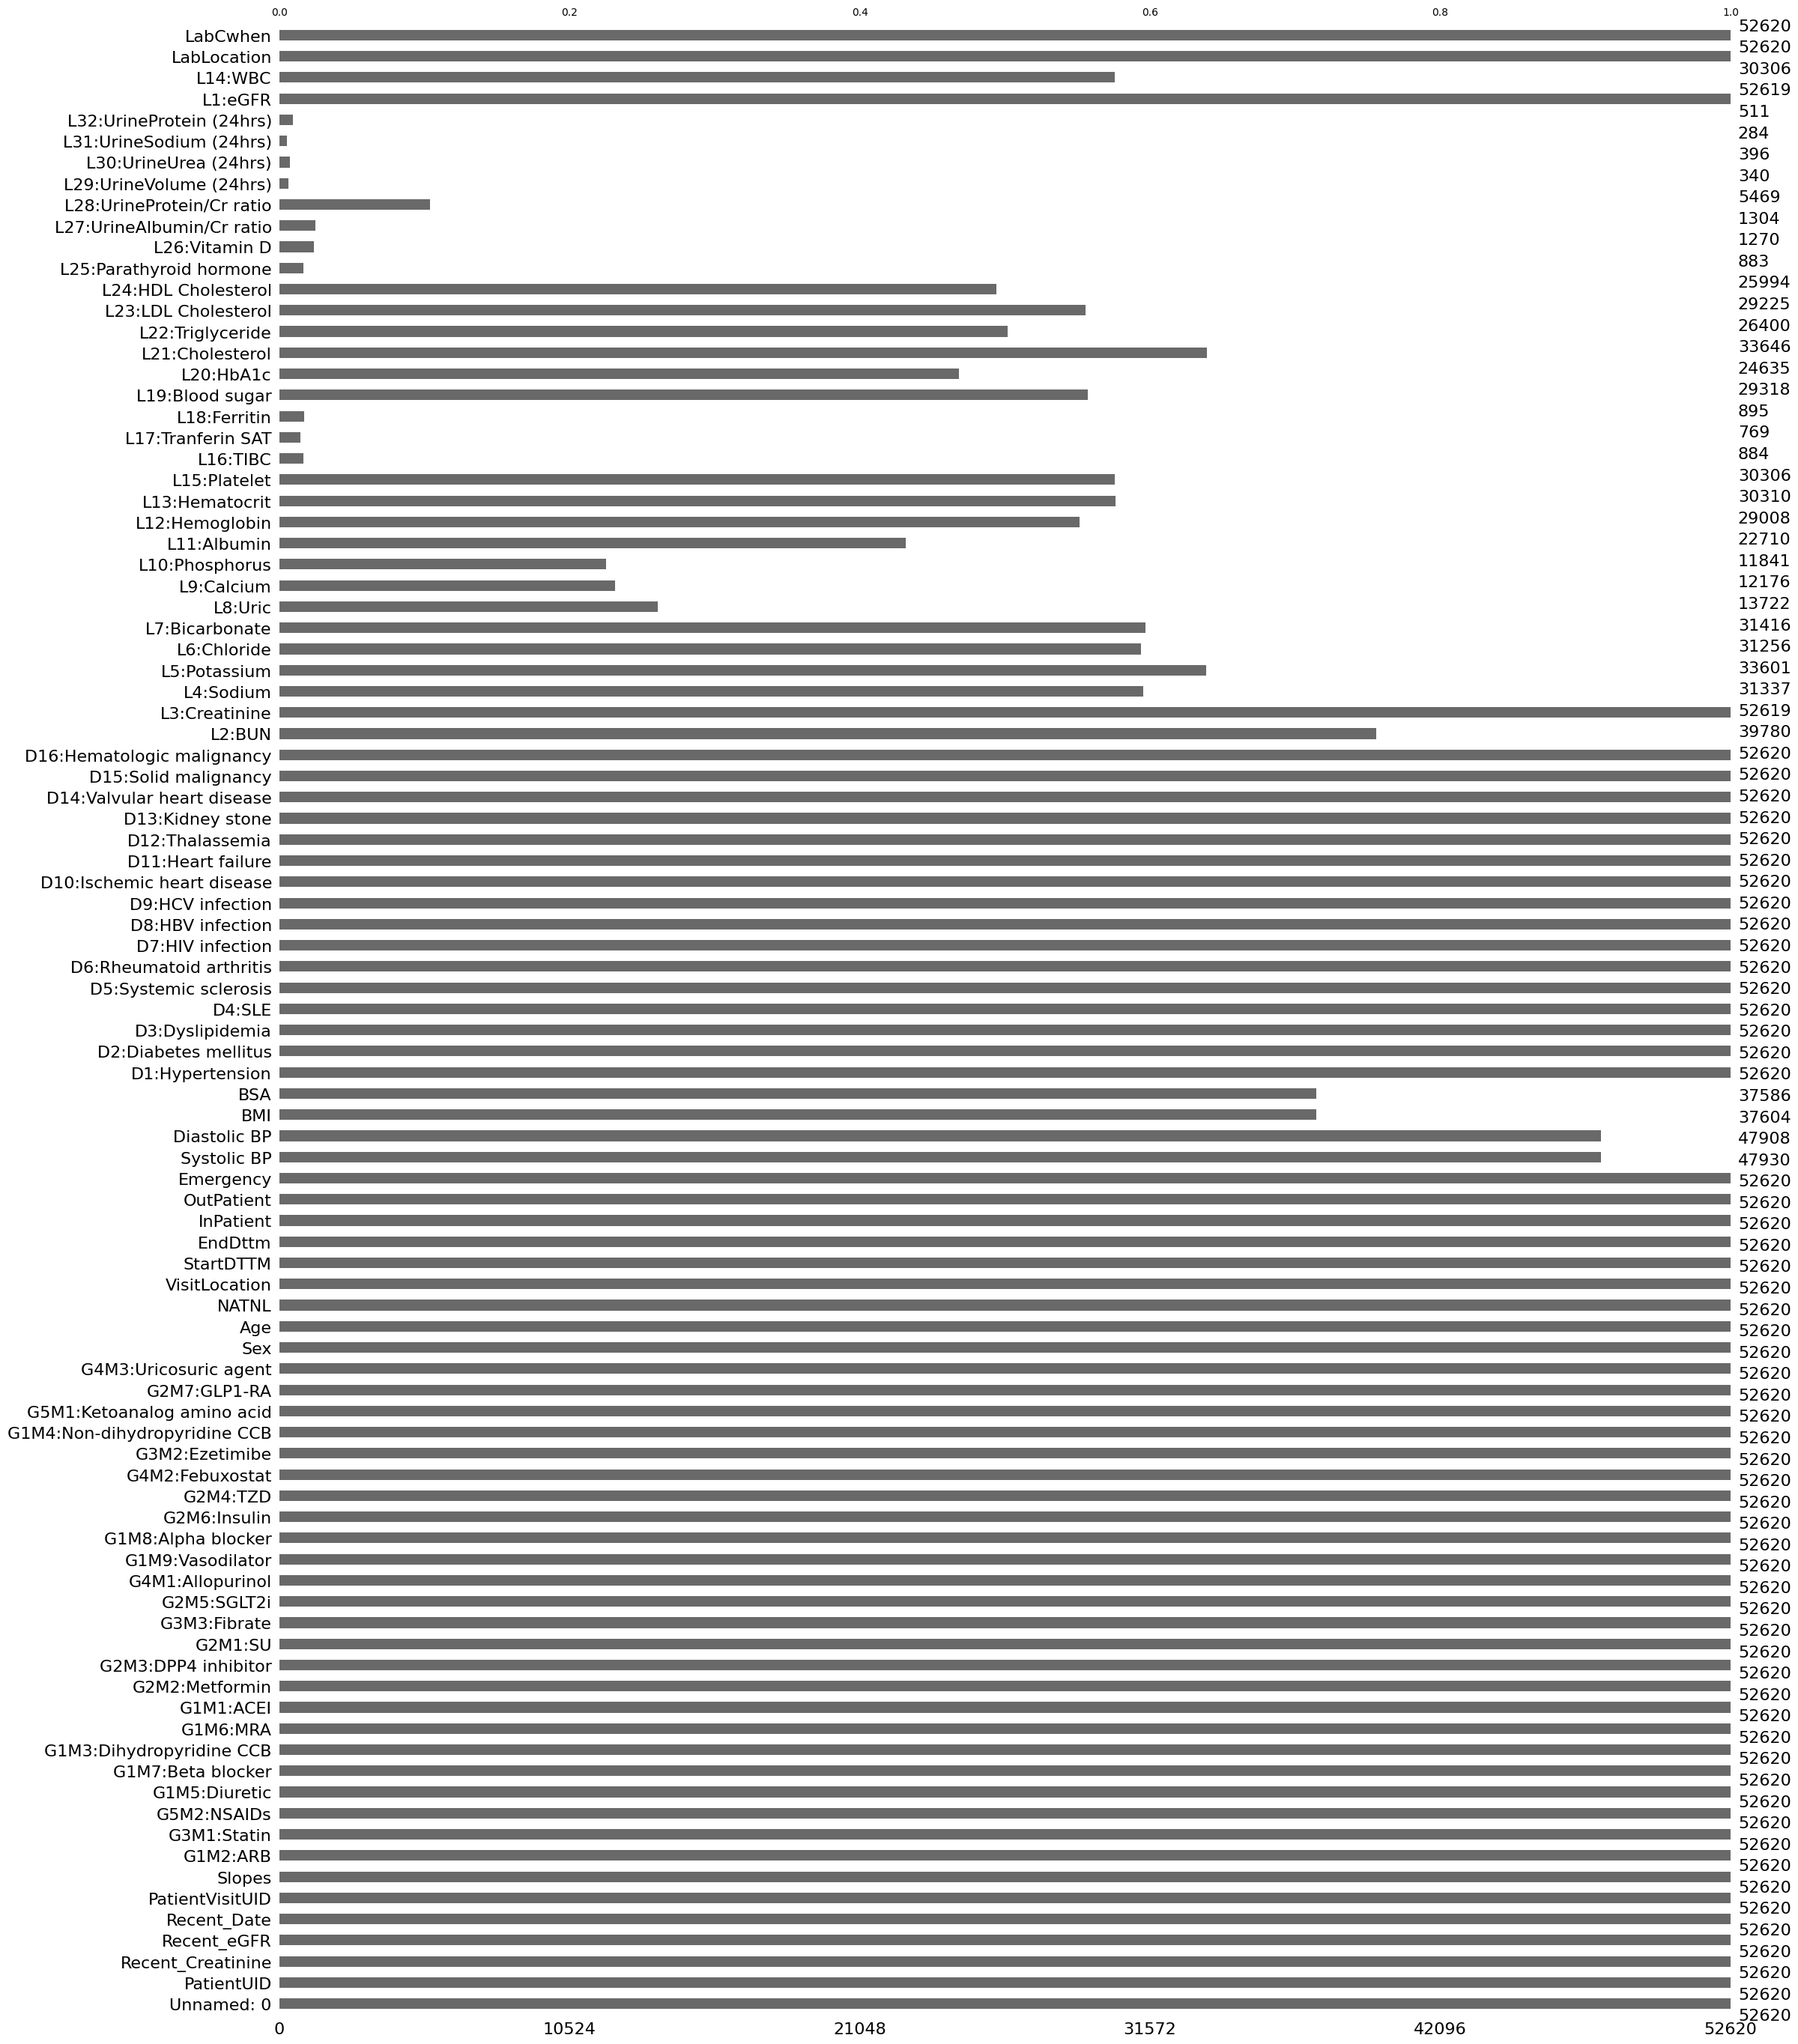

In [ ]:
import missingno as msno
msno.bar(df)


<Axes: >

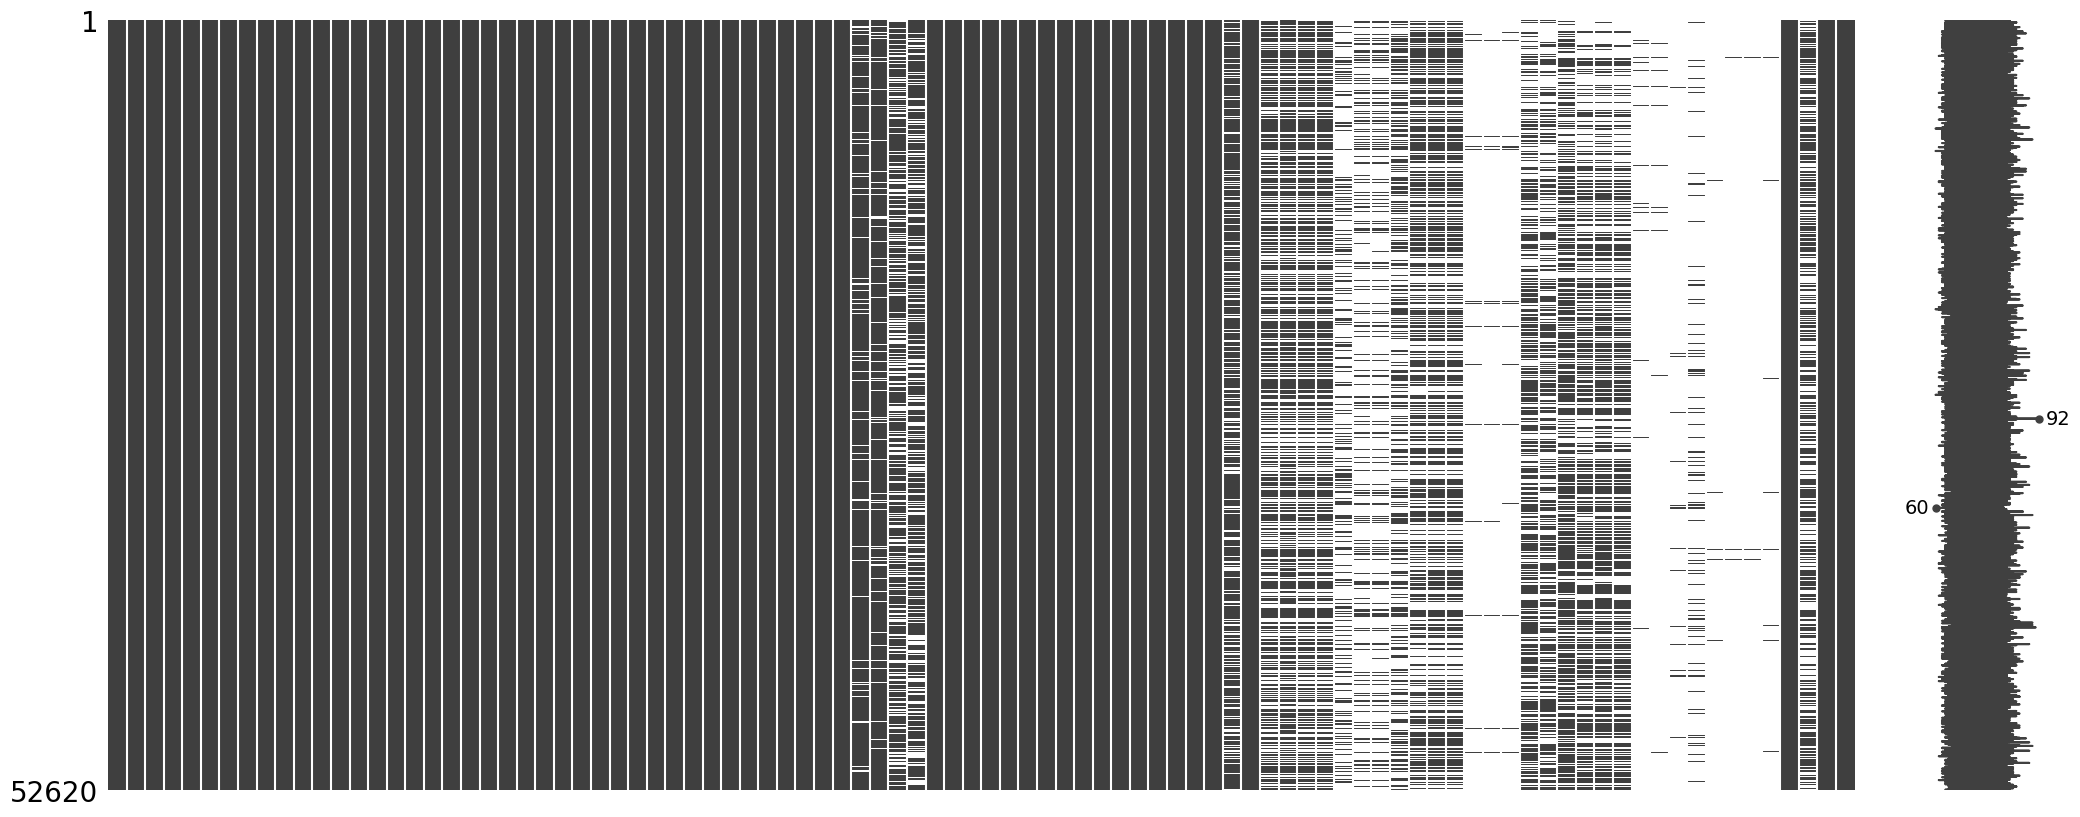

In [ ]:
msno.matrix(df)

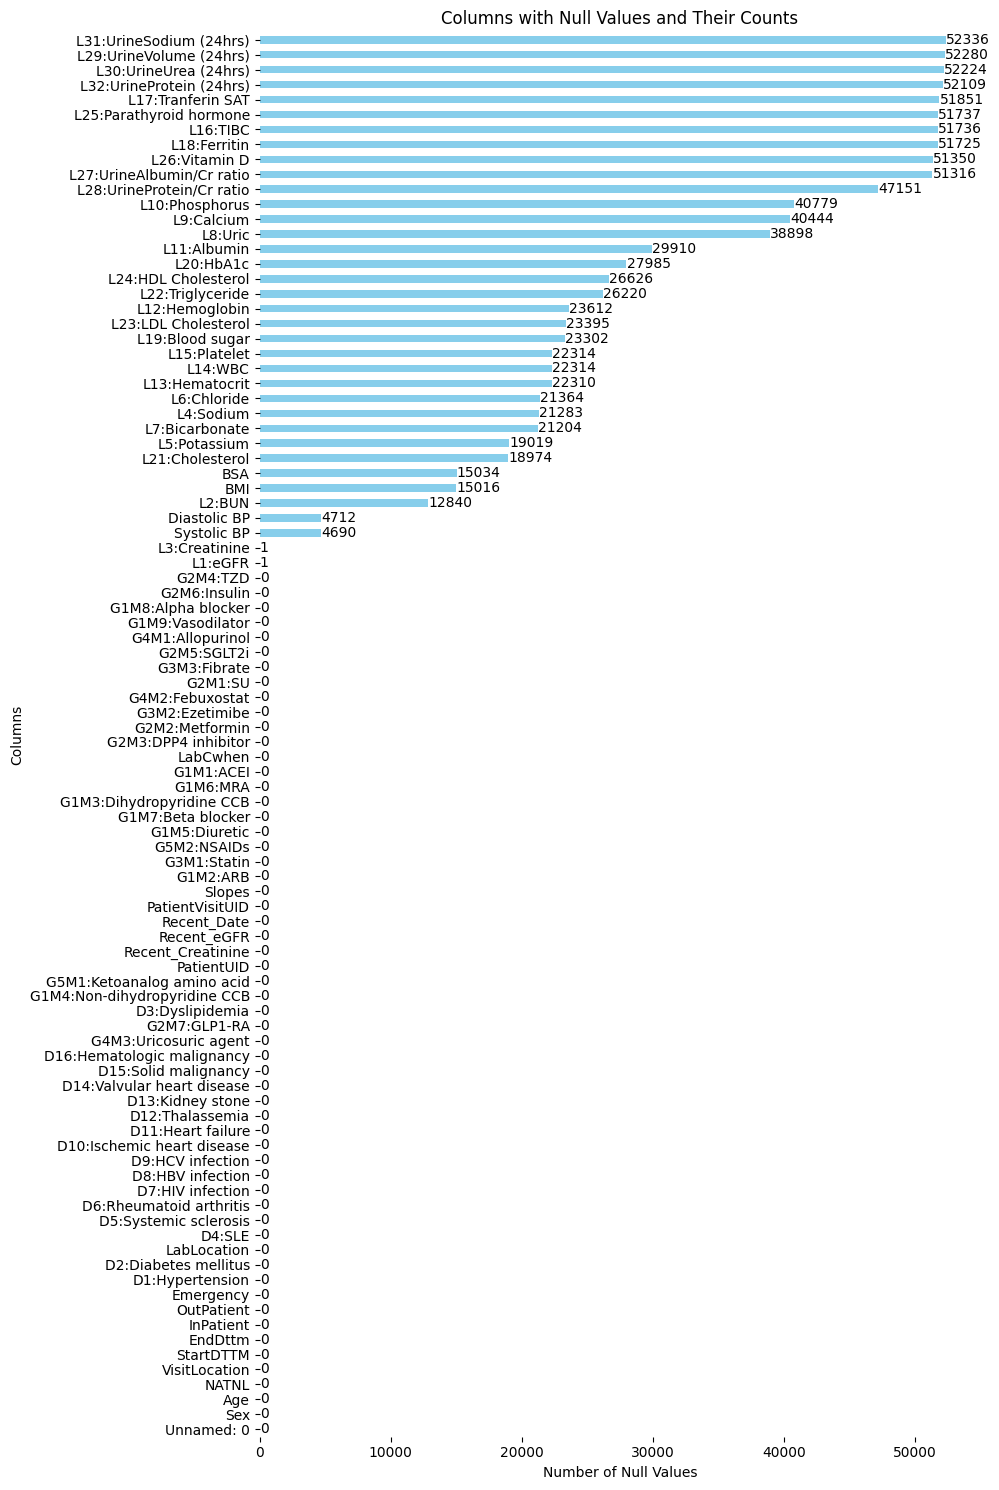

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

null_df = df.isnull()
null_count = null_df.sum()
null_count_sorted = null_count.sort_values()
plt.figure(figsize=(10, 15))  # Adjust the figsize to control the plot size
ax = null_count_sorted.plot(kind='barh', color='skyblue', edgecolor='none')  # Use 'barh' for horizontal bars
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)

plt.title('Columns with Null Values and Their Counts')
plt.xlabel('Number of Null Values')
plt.ylabel('Columns')
plt.tight_layout()
label_distance = 10
for i, v in enumerate(null_count_sorted):
    ax.text(v + label_distance, i, str(v), color='black', va='center')

plt.show()

In [ ]:
len(df.columns)

94

<Axes: >

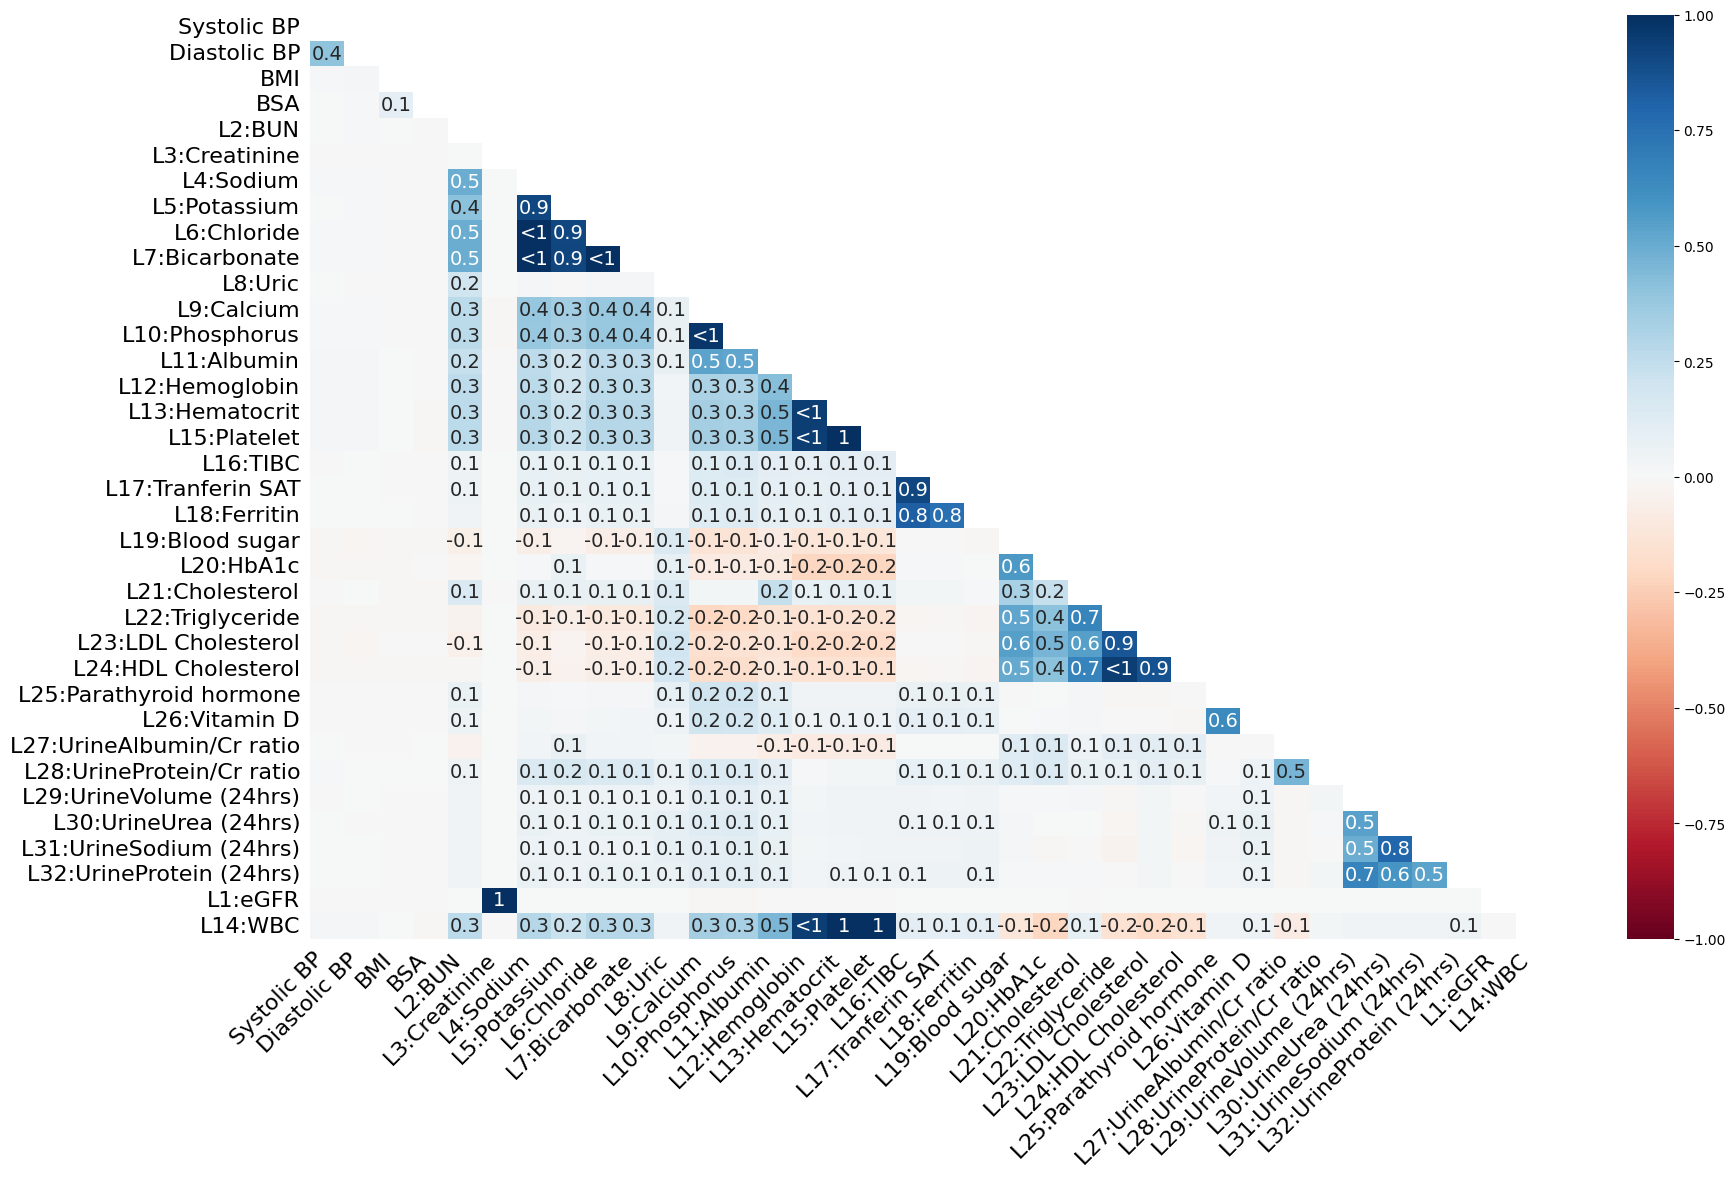

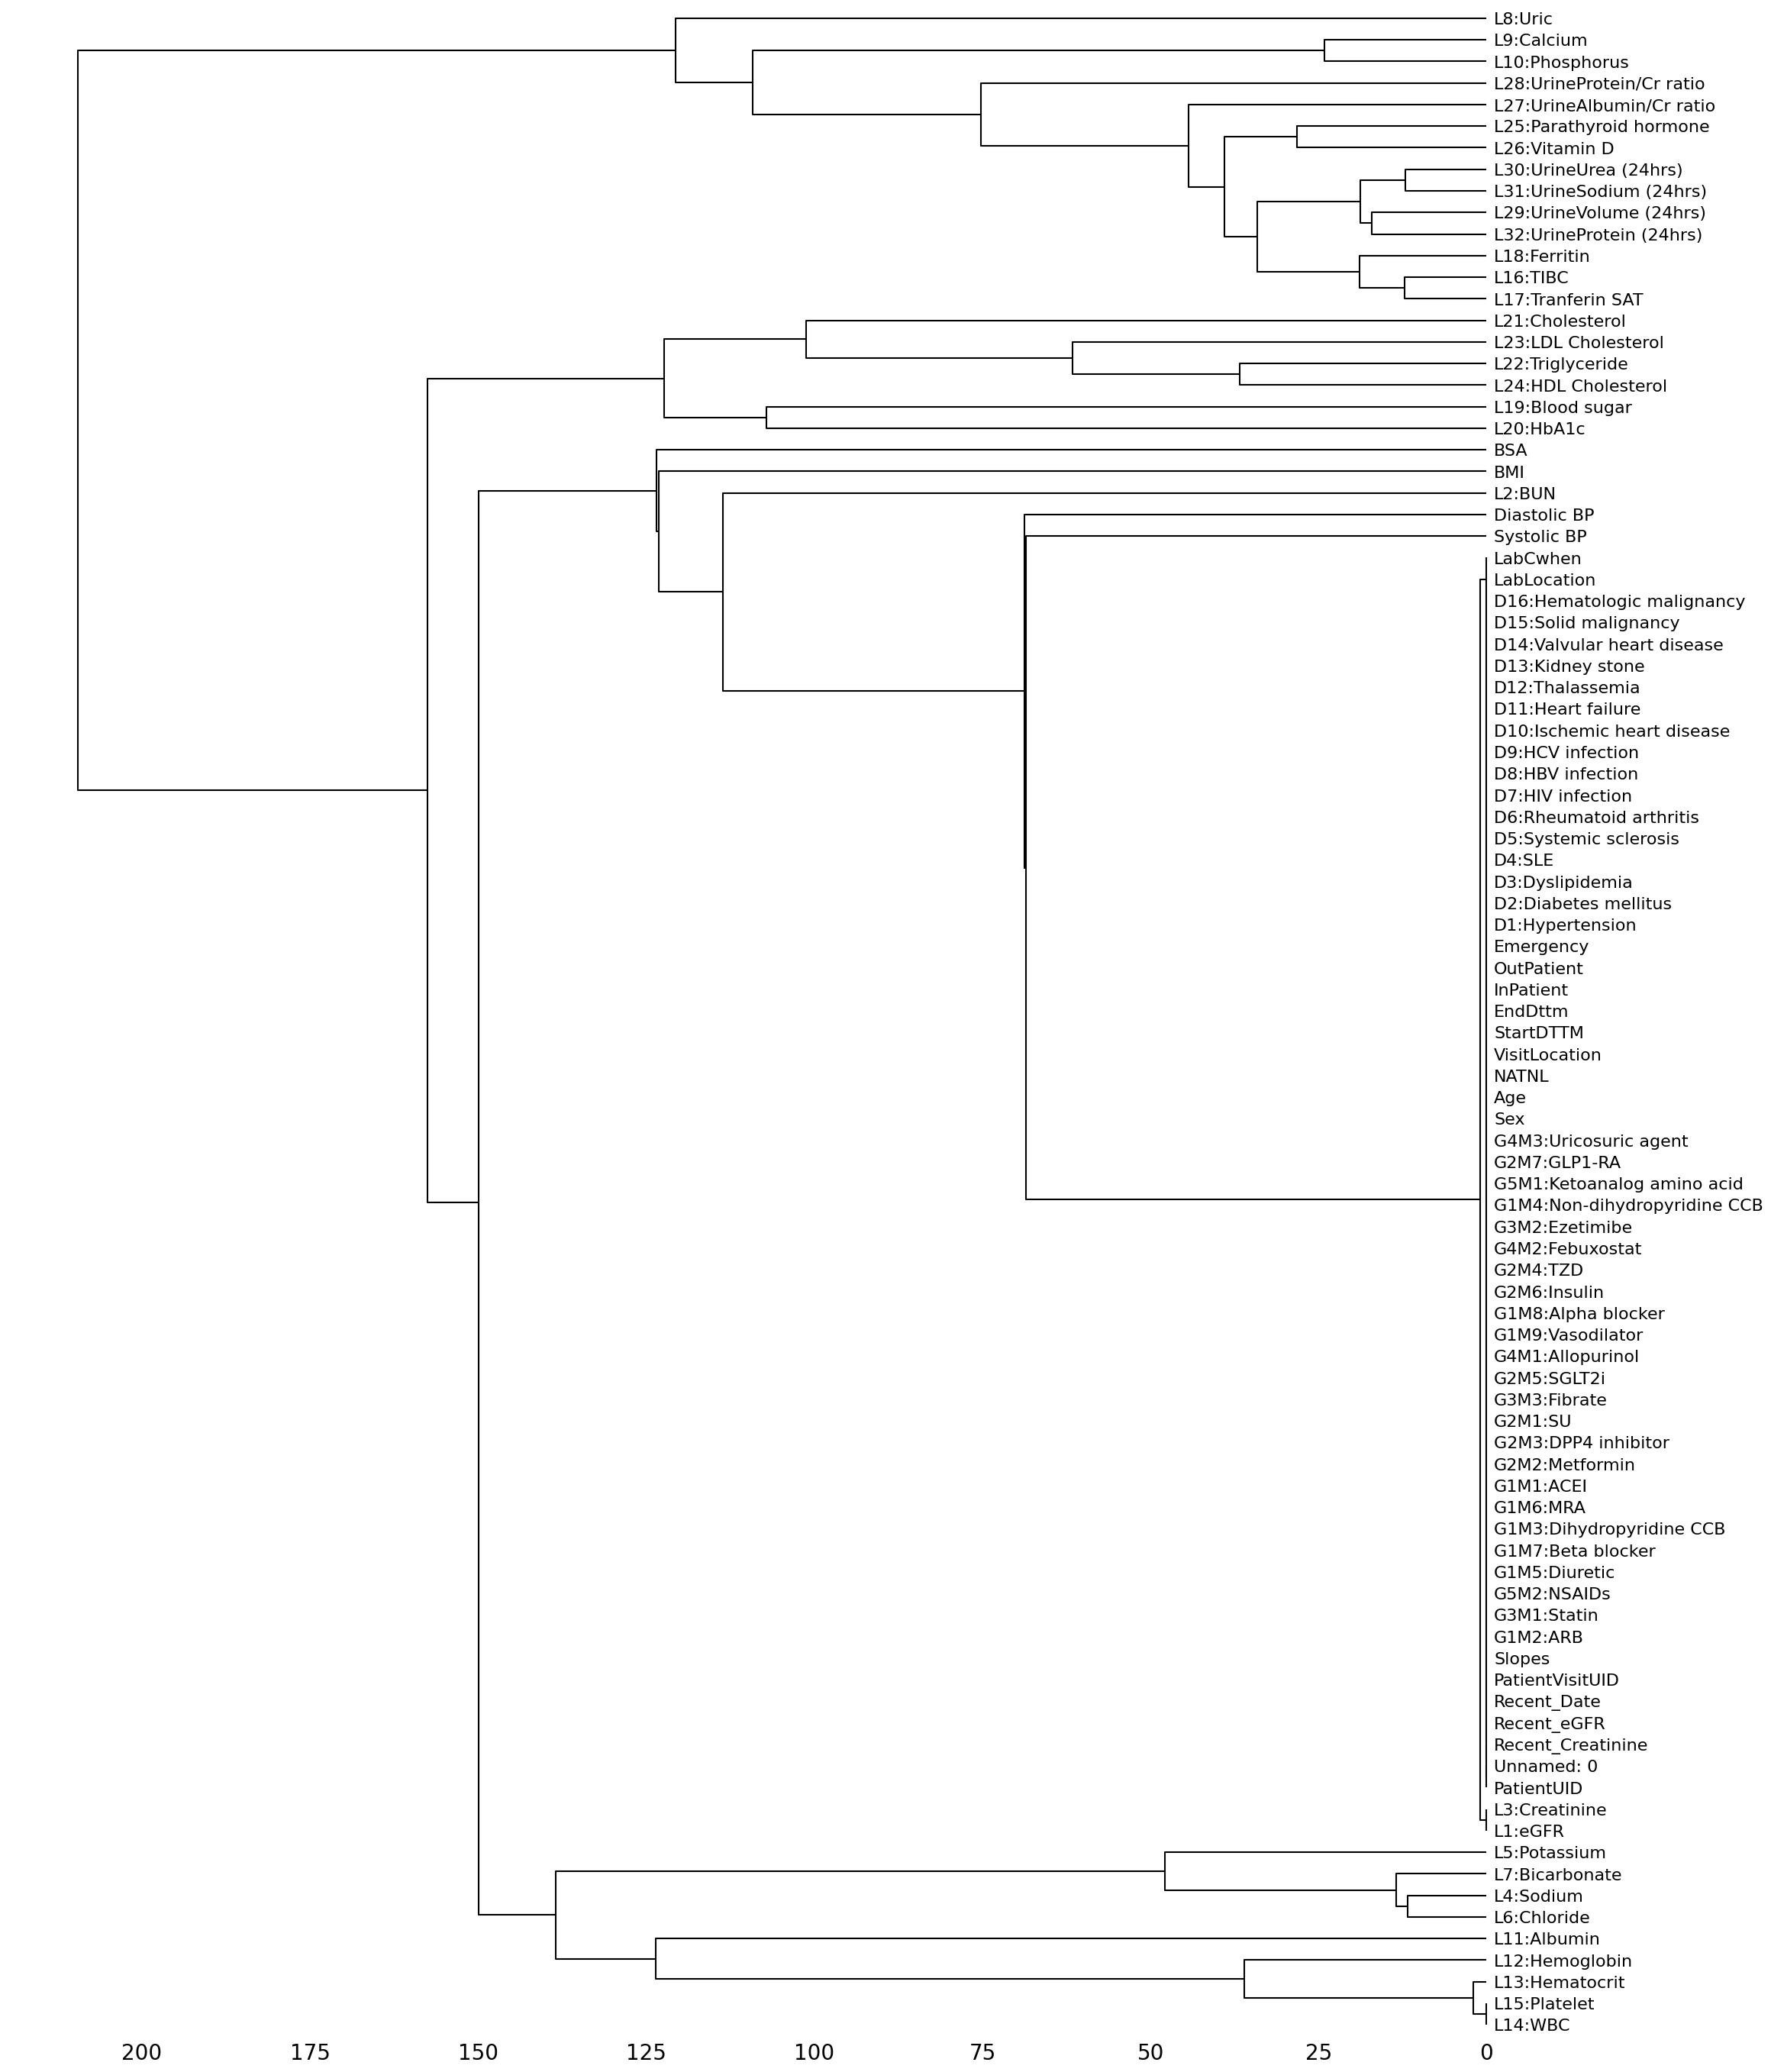

In [ ]:
msno.heatmap(df)
msno.dendrogram(df)

ดูจากค่าใน Heatmap
1. MCAR  (0) ไม่สัมพันธ์กับตัวแปรอื่น
2. MAR  (เข้าใกล้ -1) สัมพันธ์กับตัวแปรอื่นแต่ไม่สัมพันธ์กับตัวแปรของกลุ่มตัวเอง
3. MNAR  (เข้าใกล้ 1) สัมพันธ์กับตัวเเปรกลุ่มเดียวกัน
https://www.geeksforgeeks.org/python-visualize-missing-values-nan-values-using-missingno-library/ 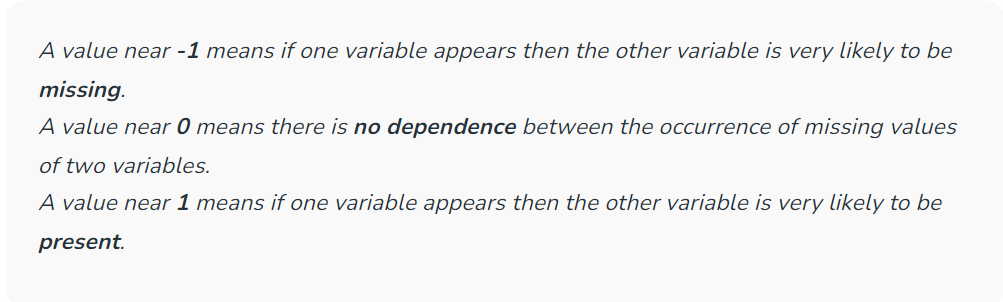
